# Project: Finding Traffic Indicators on I-94

This is a project which aims at analyzing and determining a few indicatis of heavy traffic on I-94. These indicators can be weather type, time of the day, time of the week, etc. For instanxe, we may find out that the traffic is usually heavier in the summer or when it snows.

We're going to analyze a dataset about the westbound traffic on the I-94 Interstate highway.

The full data set is available, and can be downloaded from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume)

We shall be focusing on Exploratory Data Visualization and checking on the following;
- How to visualize time series data with line plots.
- How to visualize correlations with scatter plots.
- How to visualize frequency distributions with bar plots and histograms.
- How to speed up our exploratory data visualization workflow with the pandas library.
- How to compare graphs using grid charts

## Part 1: Importing Libraries and Loading I-94 Interstate Traffic Dataset

In [20]:
## importing libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
#loading our Dataset

traffic_I_94 = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')

In [22]:
#checkinf first and last five rows
traffic_I_94.head(5)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [23]:

traffic_I_94.tail(5)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,None,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


In [24]:
traffic_I_94.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


The dataset contains 48,204 rowss and 9 columns, it has no null values. 
Each row describes traffic and weather data for specific hour.The dataset contains data from 2012-10-02 09:00:00 to 2018-09-30 23:00:00.

## Part 2: Analyzing Traffic Volume

The dataset documentation mentions that the station is located between Minneapolis and Saint Paul recorded the traffic data. Also, the station only records westbound traffic(cars moving from east to west).

This means that the results of our analysis will be about the westbound traffic in the proximity of that station. In other words, we should avoid generalizing our results for the entire I-94 highway.

The next step, plotting a histogram to visualize the distribution of the traffic_volume column.


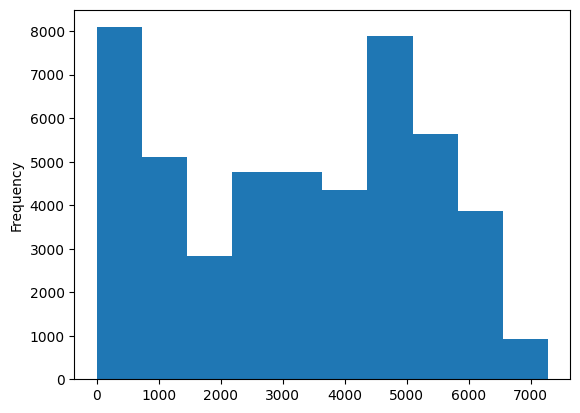

In [25]:
%matplotlib inline

traffic_I_94['traffic_volume'].plot.hist()
plt.show()

In [26]:
traffic_I_94['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

We notice 2012-10-02 09:00:00 and 2018-09-30 23:00:00, the hourly traffic volume varied between 0 and 7280 cars, with average of 3260 cars.

About 1193 cars, 25% of the time passed by the station each hour, usually at night time or when the road is under construction. Another analysis is that about 75% the traffic volume was four times as much(4933 or more cars).

Next we compare the traffic volume between daytime and nighttime.

### Traffic Volume: Day vs Night

Begin with dividing the dataset time (24 hours)  into two parts:

        - Daytime data: hours 7 AM to 7 PM(12 hours)
        - Nighttime data: hours 7 PM to 7 AM (12 hours)

In [33]:
traffic_I_94['date_time'] = pd.to_datetime(traffic_I_94['date_time'])

traffic_day = traffic_I_94.copy()[(traffic_I_94['date_time'].dt.hour >= 7) & (traffic_I_94['date_time'].dt.hour < 19)]
print(traffic_day.head(5))
print(traffic_day.shape)

traffic_night = traffic_I_94.copy()[(traffic_I_94['date_time'].dt.hour >= 19) | (traffic_I_94['date_time'].dt.hour < 7)]
print(traffic_night.head(5))
print(traffic_night.shape)

  holiday    temp  rain_1h  snow_1h  clouds_all weather_main  \
0    None  288.28      0.0      0.0          40       Clouds   
1    None  289.36      0.0      0.0          75       Clouds   
2    None  289.58      0.0      0.0          90       Clouds   
3    None  290.13      0.0      0.0          90       Clouds   
4    None  291.14      0.0      0.0          75       Clouds   

  weather_description           date_time  traffic_volume  
0    scattered clouds 2012-10-02 09:00:00            5545  
1       broken clouds 2012-10-02 10:00:00            4516  
2     overcast clouds 2012-10-02 11:00:00            4767  
3     overcast clouds 2012-10-02 12:00:00            5026  
4       broken clouds 2012-10-02 13:00:00            4918  
(23877, 9)
   holiday    temp  rain_1h  snow_1h  clouds_all weather_main  \
10    None  290.97      0.0      0.0          20       Clouds   
11    None  289.38      0.0      0.0           1        Clear   
12    None  288.61      0.0      0.0           1 

Taking the day and night data, we plot histograms of traffic volume of the two by using the grid chart method.

### Traffic Volume: Day vs Night(II)

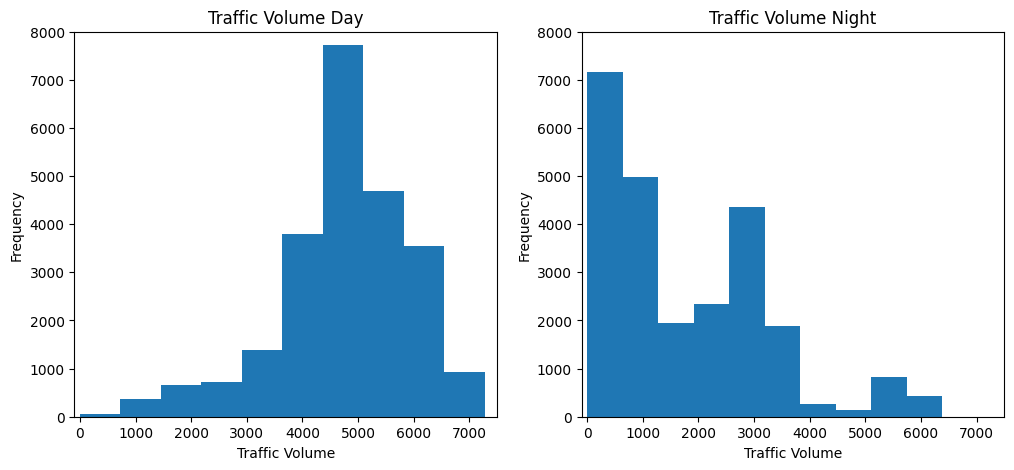

In [35]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(traffic_day['traffic_volume'])
plt.xlim(-100, 7500)
plt.ylim(0, 8000)
plt.title('Traffic Volume Day')
plt.ylabel('Frequency')
plt.xlabel('Traffic Volume')

plt.subplot(1, 2, 2)
plt.hist(traffic_night['traffic_volume'])
plt.xlim(-100, 7500)
plt.ylim(0, 8000)
plt.title('Traffic Volume Night')
plt.ylabel('Frequency')
plt.xlabel('Traffic Volume')

plt.show()

In [36]:
traffic_day['traffic_volume'].describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [37]:
traffic_night['traffic_volume'].describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

Both the plotted histograms show skewness. 
The day histrogram is left skewed, meaning most of the traffic volumes values are high with 4252 or more cars passing by the station each hour 75% of the time.
The night histogram is right skewed, meaning most of the traffic volumes are low 75% of the time with number of cars passing each hour being less than 2819.

### Time Indicators

One of the possible indicators of heavy traffic is time. Lets take a look at a few lin eplots that show the change in traffic vollume according to:
- Month
- Day of week
- Time of day

C:\Users\kuria\AppData\Local\Temp\ipykernel_22292\1587294849.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  traffic_by_month = traffic_day.groupby('month').mean()


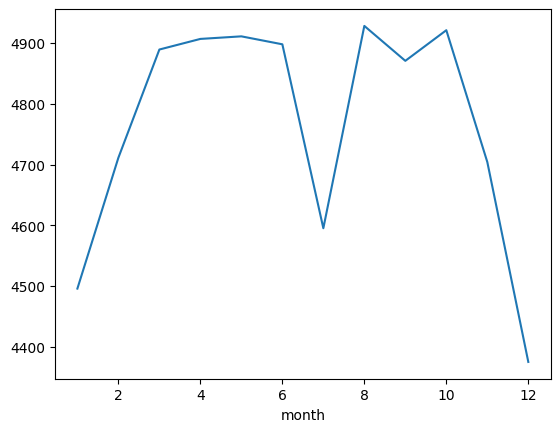

In [38]:
traffic_day['month'] = traffic_day['date_time'].dt.month
traffic_by_month = traffic_day.groupby('month').mean()
traffic_by_month['traffic_volume'].plot.line()
plt.show()

The traffic looks less heavy during cold months(November-February) and more traffic is seen during warm months(March - October).
Howver, in July there is heavy traffic, similar to other earm months. 

Lets see how the traffic voume changed each year in July.

C:\Users\kuria\AppData\Local\Temp\ipykernel_22292\1063893366.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  traffic_july.groupby('year').mean()['traffic_volume'].plot.line()


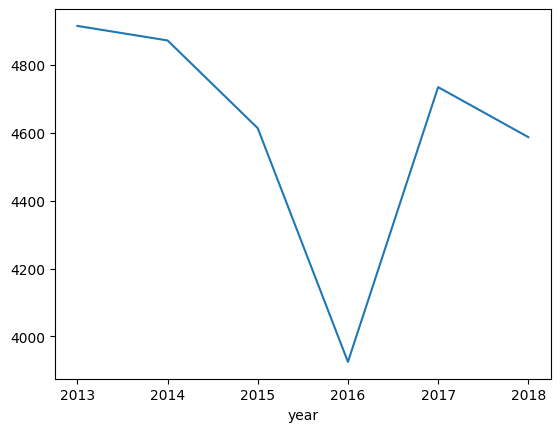

In [39]:
traffic_day['year'] = traffic_day['date_time'].dt.year
traffic_july = traffic_day[traffic_day['month'] == 7]
traffic_july.groupby('year').mean()['traffic_volume'].plot.line()
plt.show()

We notice that in 2016 there was a decrease in traffic volume this may be due to road construction, an article from 2016 supports this.

As a summary, warm months generally show heavier traffic compared to cold months. In a warm month, expect for each hour of daytime a traffic volume is close to 5000 cars.

### Time Indicators(II)

Lets plot a line plot for the day of week time unit.

C:\Users\kuria\AppData\Local\Temp\ipykernel_22292\1293855853.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  traffic_dayofweek = traffic_day.groupby('dayofweek').mean()


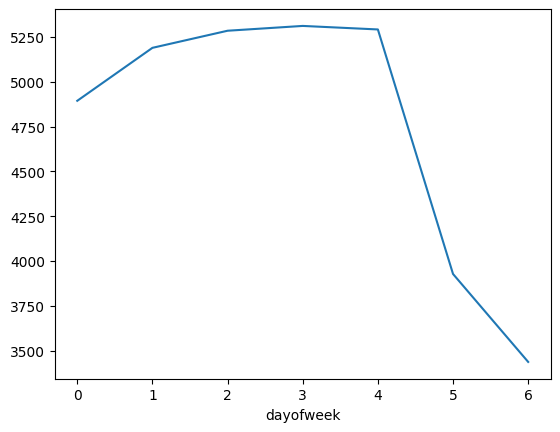

In [43]:
traffic_day['dayofweek'] = traffic_day['date_time'].dt.dayofweek
traffic_dayofweek = traffic_day.groupby('dayofweek').mean()
traffic_dayofweek['traffic_volume'].plot.line()
plt.show()


We notice that traffic volume is significantlly heavier on business daya(Monday-Friday). Except for monday, we only see values over 5000 during business days. Traffic is lighter on weekends, with values below 4000 cars.

### Time Indicators

Now we compare values based on time of the day. The weekends, however, will bring down the averages valuesm so we'rre going to look only at the averages separately.

C:\Users\kuria\AppData\Local\Temp\ipykernel_22292\3842769427.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  traffic_hour_business = traffic_bussiness_days.groupby('hour').mean()
C:\Users\kuria\AppData\Local\Temp\ipykernel_22292\3842769427.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  traffic_hour_weekend = traffic_weekend.groupby('hour').mean()


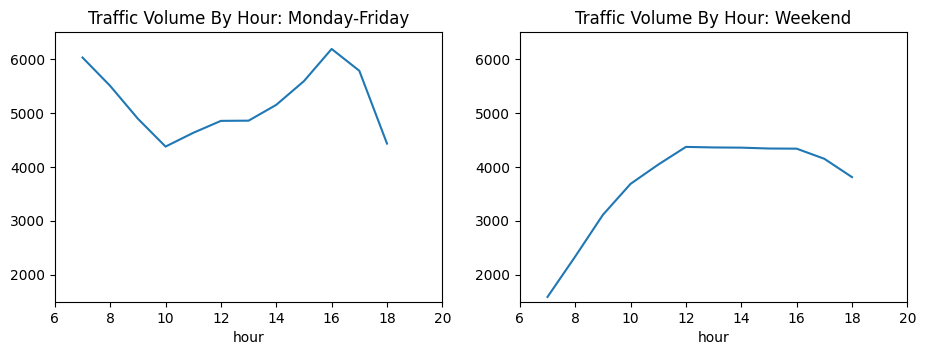

In [44]:
traffic_day['hour'] = traffic_day['date_time'].dt.hour
traffic_bussiness_days = traffic_day.copy()[traffic_day['dayofweek'] <= 4] # 4 == Friday
traffic_weekend = traffic_day.copy()[traffic_day['dayofweek'] >= 5] # 5 = Saturday
traffic_hour_business = traffic_bussiness_days.groupby('hour').mean()
traffic_hour_weekend = traffic_weekend.groupby('hour').mean()


plt.figure(figsize=(11,3.5))

plt.subplot(1, 2, 1)
traffic_hour_business['traffic_volume'].plot.line()
plt.xlim(6,20)
plt.ylim(1500,6500)
plt.title('Traffic Volume By Hour: Monday-Friday')

plt.subplot(1, 2, 2)
traffic_hour_weekend['traffic_volume'].plot.line()
plt.xlim(6,20)
plt.ylim(1500,6500)
plt.title('Traffic Volume By Hour: Weekend')

plt.show()

We notice, at each hour of the day, the traffic volume is generally higher during business days compared to the weekends. As somehow expected, rush hours around 7 and 16 - where most people are headed back home from work and vice versa. We also observe volumes of over 6000 cars at rush hours.

The following are the summary of time indicators on heavy traffic:

- The traffic is usually heavier during warm months (March–October) compared to cold months (November–February).
- The traffic is usually heavier on business days compared to weekends.
- On business days, the rush hours are around 7 and 16.


## Weather Indicators

Weather is a possible indicator of heavy traffic. In the dataset we have columns such as temp, rain_1h, snow_1h, clouds_all, weather_main, weather_description that show weather variables recorded at the station.

 Some columns are numerical therefore the look at their correlation values with traffic_volume.
 

In [45]:
traffic_day.corr()['traffic_volume']

C:\Users\kuria\AppData\Local\Temp\ipykernel_22292\744929296.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  traffic_day.corr()['traffic_volume']


temp              0.128317
rain_1h           0.003697
snow_1h           0.001265
clouds_all       -0.032932
traffic_volume    1.000000
month            -0.022337
year             -0.003557
dayofweek        -0.416453
hour              0.172704
Name: traffic_volume, dtype: float64

Temperature shows the strongest correlation with value of +0.13. The ther relevant (rain_1h, snow_1h, clouds_all) show no correlation with traffic_value.

Lets generate a scatter plot visualize the correlation between temp and traffic_volume.

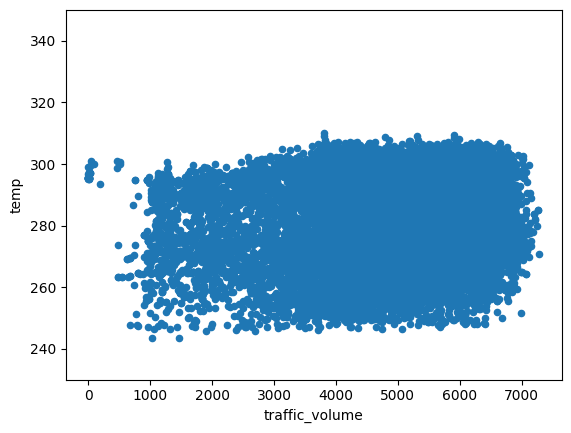

In [48]:
traffic_day.plot.scatter('traffic_volume', 'temp')
plt.ylim(230, 350)
plt.show()

We coonclude that temperature doesnt look like a solid indicato of heavy traffic.

Lets now look at the other weather realted columns: weather_main and weather_description.

C:\Users\kuria\AppData\Local\Temp\ipykernel_22292\1507097400.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  traffic_weather_main = traffic_day.groupby('weather_main').mean()


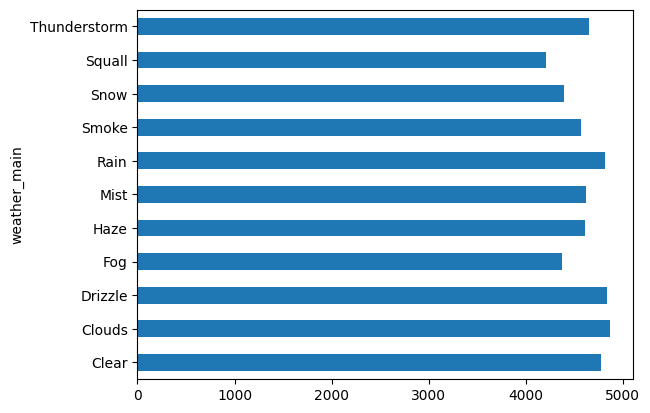

In [51]:
traffic_weather_main = traffic_day.groupby('weather_main').mean()
traffic_weather_main['traffic_volume'].plot.barh()
plt.show()

It seems like ther is no weather type where traffic volume exceeds 500 cars.

Next, we group by weather_description, which has more granular weather classification.

C:\Users\kuria\AppData\Local\Temp\ipykernel_22292\2900304311.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  traffic_weather_description = traffic_day.groupby('weather_description').mean()


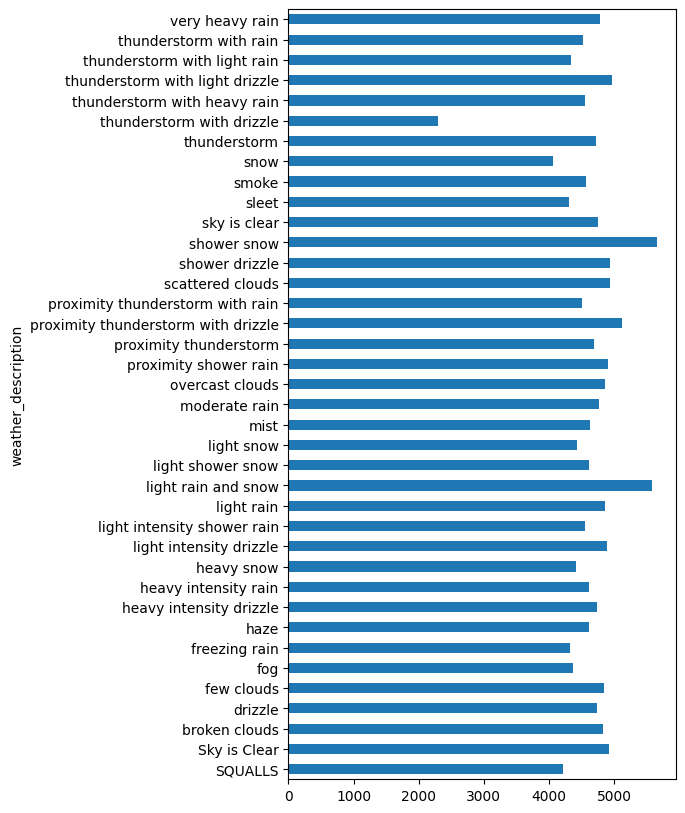

In [53]:
traffic_weather_description = traffic_day.groupby('weather_description').mean()
traffic_weather_description['traffic_volume'].plot.barh(figsize=(5, 10))
plt.show()

It looks like there are three weather types where traffic volume exceeds 5,000:

- Shower snow
- Light rain and snow
- Proximity thunderstorm with drizzle

It's not clear why these weather types have the highest average traffic values — this is bad weather, but not that bad. Perhaps more people take their cars out of the garage when the weather is bad instead of riding a bike or walking.

## Conclusion
In this project, we tried to find a few indicators of heavy traffic on the I-94 Interstate highway. 

We managed to find two types of indicators:

    - Time indicators
        - The traffic is usually heavier during warm months (March–October) compared to cold months (November–February).
        - The traffic is usually heavier on business days compared to the weekends.
        - On business days, the rush hours are around 7 and 16.
    - Weather indicators
        - Shower snow
        - Light rain and snow
        - Proximity thunderstorm with drizzle